In [9]:
import pandas as pd

# Load the dataset
df = pd.read_csv("C:\\Users\\CVR\\Downloads\\retail_sales_dataset.csv")
df


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [11]:
# Check for missing values
print(df.isnull().sum())

# Fill missing values for numerical columns
df['Quantity'].fillna(df['Quantity'].median(), inplace=True)
df['Price per Unit'].fillna(df['Price per Unit'].median(), inplace=True)
df['Total Amount'].fillna(df['Total Amount'].median(), inplace=True)

# Fill missing values for categorical columns (if they exist)
if 'Gender' in df.columns:
    df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
if 'Product Category' in df.columns:
    df['Product Category'].fillna(df['Product Category'].mode()[0], inplace=True)

# Drop rows with too many missing values
df.dropna(thresh=len(df.columns)//2, inplace=True)

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


In [12]:
import pandas as pd

# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract new features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Weekday'] = df['Date'].dt.weekday  # Monday=0, Sunday=6
df['Quarter'] = df['Date'].dt.quarter

# Create Weekend column
df['Weekend'] = df['Weekday'].apply(lambda x: 1 if x >= 5 else 0)

# Verify the output
print(df[['Date', 'Year', 'Month', 'Day', 'Weekday', 'Quarter', 'Weekend']].head())

        Date  Year  Month  Day  Weekday  Quarter  Weekend
0 2023-11-24  2023     11   24        4        4        0
1 2023-02-27  2023      2   27        0        1        0
2 2023-01-13  2023      1   13        4        1        0
3 2023-05-21  2023      5   21        6        2        1
4 2023-05-06  2023      5    6        5        2        1


In [4]:
# Check for duplicates
print(df.duplicated().sum())

# Remove duplicates
df.drop_duplicates(inplace=True)

0


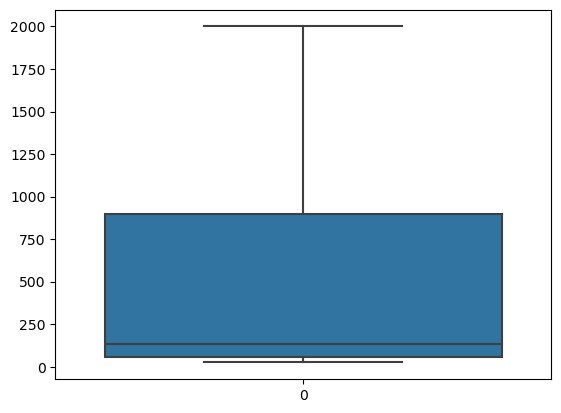

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

# Boxplot for Total Amount
sns.boxplot(df['Total Amount'])
plt.show()

# Z-score method
df['Z_score'] = zscore(df['Total Amount'])
df = df[(df['Z_score'] < 3) & (df['Z_score'] > -3)]  # Keep rows within 3 standard deviations

# IQR method
Q1 = df['Total Amount'].quantile(0.25)
Q3 = df['Total Amount'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['Total Amount'] >= Q1 - 1.5*IQR) & (df['Total Amount'] <= Q3 + 1.5*IQR)]

# Cap sales at a reasonable max limit
max_limit = df['Total Amount'].quantile(0.95)
df['Total Amount'] = df['Total Amount'].clip(upper=max_limit)

In [15]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Check if the columns exist
if 'Store' in df.columns:
    df['Store'] = le.fit_transform(df['Store'])
    print("Label encoding applied to 'Store'.")
else:
    print("Column 'Store' not found in the DataFrame.")

if 'Item' in df.columns:
    df['Item'] = le.fit_transform(df['Item'])
    print("Label encoding applied to 'Item'.")
else:
    print("Column 'Item' not found in the DataFrame.")

# Display the updated DataFrame
df.head()

Column 'Store' not found in the DataFrame.
Column 'Item' not found in the DataFrame.


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Year,Month,Day,Weekday,Quarter,Weekend
0,1,2023-11-24,0,Male,34,0,3,50,150,2023,11,24,4,4,0
1,2,2023-02-27,1,Female,26,1,2,500,1000,2023,2,27,0,1,0
2,3,2023-01-13,2,Male,50,2,1,30,30,2023,1,13,4,1,0
3,4,2023-05-21,3,Male,37,1,1,500,500,2023,5,21,6,2,1
4,5,2023-05-06,4,Male,30,0,2,50,100,2023,5,6,5,2,1


In [17]:
# 6. Feature Engineering
# Total Amount per Quantity
df['Amount_per_Unit'] = df['Total Amount'] / (df['Quantity'] + 1)  # Added 1 to avoid division by zero

# Total Amount Growth Rate
df['Amount_Growth_Rate'] = df['Total Amount'].pct_change().fillna(0)

# Lag Features (previous day's total amount)
df['Lag_1'] = df['Total Amount'].shift(1)

# Rolling Averages
df['Rolling_Mean_7'] = df['Total Amount'].rolling(window=7).mean()

# Save cleaned dataset
df.to_csv('cleaned_retail_sales_dataset.csv', index=False)

print("Data cleaning and preprocessing completed successfully!")


Data cleaning and preprocessing completed successfully!
